<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [114]:
# -- import libraries here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [115]:
# -- your code here 
estate= pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/Real_estate.csv")


In [116]:
estate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [117]:
estate.tail()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5
413,2013.500,6.5,90.45606,9,63.9


In [118]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transaction_date              414 non-null    float64
 1   house_age                     414 non-null    float64
 2   distance_nearest_MRT_station  414 non-null    float64
 3   convenience_stores            414 non-null    int64  
 4   house_price_unit_area         414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [119]:
# -- your code here 
estate["log10_distance_nearest_MRT_station"]= np.log10(estate["distance_nearest_MRT_station"])
estate

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log10_distance_nearest_MRT_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4,3.610875
410,2012.667,5.6,90.45606,9,50.0,1.956438
411,2013.250,18.8,390.96960,7,40.6,2.592143
412,2013.000,8.1,104.81010,5,52.5,2.020403


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [120]:
# -- your code here
features= estate[["log10_distance_nearest_MRT_station"]]
target= estate["house_price_unit_area"]

In [121]:
features_s= (features-features.mean())/features.std()
target_s= (target- target.mean())/target.std()

Using the code library of your choice, fit a linear regression model to the data

In [122]:
# -- your code here
mlr_s= LinearRegression()
mlr_s.fit(features_s, target_s)

LinearRegression()

Print both the $R^2$ and Adjusted-$R^2$ of this model 

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [123]:
# -- your code here
#r2 = 0.539
#adjusted-r2 = 0.538
R2=mlr_s.score(features_s, target_s)
print("r2 ={0:.3f}".format(R2))
n=414
p=1
adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print("adjusted-r2 ={0:.3f}".format(adj_r2))


r2 =0.539
adjusted-r2 =0.538


Print the coefficient (slope) of the line

In [124]:
# -- your code here
(slopee)= mlr_s.coef_
print("coefficient = {0}".format(slopee))


coefficient = [-0.73433864]


In [125]:
estate["house_price_unit_area1"]=target_s

From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

the slope is negative and this means that there is a negative relationship between them. an increase in one value will lead to a decrease in another.

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

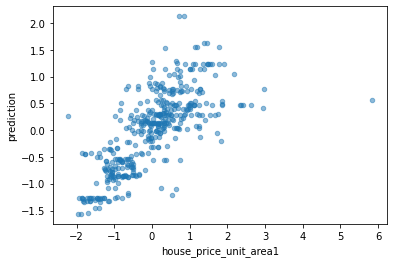

In [126]:
# -- your code here
estate["prediction"] = mlr_s.predict(features_s)

estate.plot("house_price_unit_area1", "prediction", kind="scatter", alpha=0.5);

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [127]:
# -- your code here

estate.columns

Index(['transaction_date', 'house_age', 'distance_nearest_MRT_station',
       'convenience_stores', 'house_price_unit_area',
       'log10_distance_nearest_MRT_station', 'house_price_unit_area1',
       'prediction'],
      dtype='object')

In [128]:
features1= estate[['transaction_date', 'house_age','log10_distance_nearest_MRT_station','convenience_stores' ]]
features1_s= (features1-features1.mean())/features1.std()


In [129]:
features1_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   transaction_date                    414 non-null    float64
 1   house_age                           414 non-null    float64
 2   log10_distance_nearest_MRT_station  414 non-null    float64
 3   convenience_stores                  414 non-null    float64
dtypes: float64(4)
memory usage: 13.1 KB


Using the code library of your choice, fit a multiple linear regression model to the data

In [130]:
# -- your code here
mlr_s2= LinearRegression()
mlr_s2.fit(features1_s, target_s)


LinearRegression()

Print the coefficients of each of the features

In [131]:
# -- your code here
(ctd, cha,cld,ccs)=mlr_s2.coef_
print("coefficient for log_dist_MRT = {0:.3}".format(cld))
print("coefficient for convenience_stores = {0:.3}".format(ccs))
print("coefficient for transaction_date = {0:.3}".format(ctd))
print("coefficient for house_age = {0:.3}".format(cha))



coefficient for log_dist_MRT = -0.643
coefficient for convenience_stores = 0.137
coefficient for transaction_date = 0.152
coefficient for house_age = -0.177


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

from the coefficients, 



*   an increase in log_dist_MRT will lead to a decrease in the prediction of the target variable and vice versa.
*   an increase in convenience_stores will lead to a increase in the prediction of the target variable.


*   an increase in transaction_date will lead to a increase in the prediction of the target variable.
*   an increase in house_age will lead to a decrease in the prediction of the target variable.







Print the $R^2$ of this model

In [132]:
# -- your code here
R22=mlr_s2.score(features1_s, target_s)
print("r2 ={0:.3f}".format(R22))


r2 =0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

i would say yes it has improved. this is because the r-squared value has moved closer to 1.

Print the Adjusted-$R^2$ of this model

In [133]:
# -- your code here
n=414
P=4
Adj_r2 = 1-(1-R22)*(n-1)/(n-P-1)
print("adjusted-r2 ={0:.3f}".format(Adj_r2))

adjusted-r2 =0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

before the addition, adjusted-r2 =0.538. After the addition, adjusted-r2 =0.597.
If we consider the adjusted r squared alone, i will say the model has improved because there was an increase in the value.

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2? 

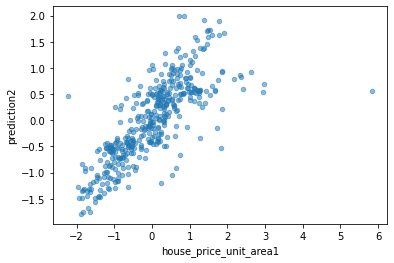

In [134]:
# -- your code here
estate["prediction2"] = mlr_s2.predict(features1_s)
estate.plot("house_price_unit_area1", "prediction2", kind="scatter", alpha=0.5,);